In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rc
from scipy.signal import find_peaks 
from cProfile import label
from scipy.integrate import quad

In [2]:
uvvis_path = "MnSpecies_uvvis.CSV"
uvvis=pd.read_csv(uvvis_path, sep = ';', decimal = ',')

peak_path = "MnSpecies_peak.CSV"
peak=pd.read_csv(peak_path, sep = ';', decimal = ',')

uvvis_water_path = "MnSpecies_water_uvvis.CSV"
uvvis_water=pd.read_csv(uvvis_water_path, sep = ';', decimal = ',')

peak_water_path = "MnSpecies_water_peak.CSV"
peak_water=pd.read_csv(peak_water_path, sep = ';', decimal = ',')

MnCl2aq_uvvis_path = "functional_uvvis.CSV"
MnCl2aq_uvvis=pd.read_csv(MnCl2aq_uvvis_path, sep = ';', decimal = ',')

MnCl2aq_peak_path = "functional_peak.CSV"
MnCl2aq_peak=pd.read_csv(MnCl2aq_peak_path, sep = ';', decimal = ',')

MnCl2aq_uvvis_water_path = "functional_uvvis_water.CSV"
MnCl2aq_uvvis_water=pd.read_csv(MnCl2aq_uvvis_water_path, sep = ';', decimal = ',')

MnCl2aq_peak_water_path = "functional_peak_water.CSV"
MnCl2aq_peak_water=pd.read_csv(MnCl2aq_peak_water_path, sep = ';', decimal = ',')

camb3lyp_uvvis_path = "camb3lyp_uvvis.CSV"
camb3lyp_uvvis=pd.read_csv(camb3lyp_uvvis_path, sep = ';', decimal = ',')

camb3lyp_peak_path = "camb3lyp_peak.CSV"
camb3lyp_peak=pd.read_csv(camb3lyp_peak_path, sep = ';', decimal = ',')

camb3lyp_uvvis_water_path = "camb3lyp_water_uvvis.CSV"
camb3lyp_uvvis_water=pd.read_csv(camb3lyp_uvvis_water_path, sep = ';', decimal = ',')

camb3lyp_peak_water_path = "camb3lyp_water_peak.CSV"
camb3lyp_peak_water=pd.read_csv(camb3lyp_peak_water_path, sep = ';', decimal = ',')

wb97xd_uvvis_path = "wb97xd_uvvis.CSV"
wb97xd_uvvis=pd.read_csv(wb97xd_uvvis_path, sep = ';', decimal = ',')

wb97xd_peak_path = "wb97xd_peak.CSV"
wb97xd_peak=pd.read_csv(wb97xd_peak_path, sep = ';', decimal = ',')

wb97xd_uvvis_water_path = "wb97xd_water_uvvis.CSV"
wb97xd_uvvis_water=pd.read_csv(wb97xd_uvvis_water_path, sep = ';', decimal = ',')

wb97xd_peak_water_path = "wb97xd_water_peak.CSV"
wb97xd_peak_water=pd.read_csv(wb97xd_peak_water_path, sep = ';', decimal = ',')

In [22]:
ForRep_path = "cross_sec_ForRepShort.csv"
ForRep=pd.read_csv(ForRep_path, index_col=0)

cross_sec_b3lyp_path = 'cross_sec_b3lyp.csv'
cross_sec_b3lyp = pd.read_csv(cross_sec_b3lyp_path)

cross_sec_camb3lyp_path = 'cross_sec_camb3lyp.csv'
cross_sec_camb3lyp = pd.read_csv(cross_sec_camb3lyp_path)

cross_sec_wb97xd_path = 'cross_sec_wb97xd.csv'
cross_sec_wb97xd = pd.read_csv(cross_sec_wb97xd_path)

CrossSec_b3lyp_water_path = 'CrossSec_b3lyp_water.csv'
CrossSec_b3lyp_water = pd.read_csv(CrossSec_b3lyp_water_path)

CrossSec_camb3lyp_water_path = 'CrossSec_camb3lyp_water.csv'
CrossSec_camb3lyp_water = pd.read_csv(CrossSec_camb3lyp_water_path)

CrossSec_wb97xd_water_path = 'CrossSec_wb97xd_water.csv'
CrossSec_wb97xd_water = pd.read_csv(CrossSec_wb97xd_water_path)

In [5]:
def make_subplot_functional(axes, dataname, xdataname,  ydataname, displaylabel, scilimit, ncols):
    ax = axes
    sns.lineplot(data = dataname, x = xdataname, y = ydataname, ax = ax, label = displaylabel)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimit)
    ax.yaxis.offsetText.set_fontsize(9)
    # ax.legend(frameon = False, fontsize = 8)
    ax.legend(frameon = False, ncol=ncols, loc = 4, bbox_to_anchor = (0.89,0.96), fontsize = 8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

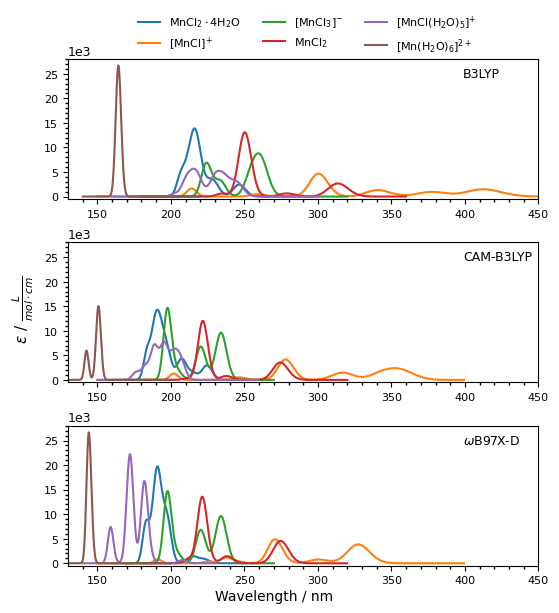

In [10]:
fig, axes = plt.subplots(3,1, figsize=(5.5,6))

make_subplot_functional(axes[0], MnCl2aq_uvvis, 'X b3lyp6311++', 'Y b3lyp6311++', r'MnCl$_{2}\cdot4$H$_{2}$O', (3,3), 3)
make_subplot_functional(axes[0], uvvis, 'X MnCl+', 'Y MnCl+', r'[MnCl]$^{+}$', (3,3), 3)
make_subplot_functional(axes[0], uvvis, 'X MnCl3-', 'Y MnCl3-', r'[MnCl$_{3}$]$^{-}$', (3,3), 3)
make_subplot_functional(axes[0], uvvis, 'X MnCl2', 'Y MnCl2', r'MnCl$_{2}$', (3,3), 3)
make_subplot_functional(axes[0], uvvis, 'X MnClH2O', 'Y MnClH2O', r'[MnCl(H$_{2}$O)$_{5}$]$^{+}$', (3,3), 3)
make_subplot_functional(axes[0], uvvis, 'X MnH2O', 'Y MnH2O', r'[Mn(H$_{2}$O)$_{6}$]$^{2+}$', (3,3), 3)

make_subplot_functional(axes[1], MnCl2aq_uvvis, 'X c-b6311++', 'Y c-b6311++', None, (3,3), 1)
make_subplot_functional(axes[1], camb3lyp_uvvis, 'X MnCl+', 'Y MnCl+', None, (3,3), 1)
make_subplot_functional(axes[1], camb3lyp_uvvis, 'X MnCl3-', 'Y MnCl3-', None, (3,3), 1)
make_subplot_functional(axes[1], camb3lyp_uvvis, 'X MnCl2', 'Y MnCl2', None, (3,3), 1)
make_subplot_functional(axes[1], camb3lyp_uvvis, 'X MnClH2O', 'Y MnClH2O', None, (3,3), 1)
make_subplot_functional(axes[1], camb3lyp_uvvis, 'X MnH2O', 'Y MnH2O', None, (3,3), 1)

make_subplot_functional(axes[2], MnCl2aq_uvvis, 'X wb6311++', 'Y wb6311++', None, (3,3), 1)
make_subplot_functional(axes[2], wb97xd_uvvis, 'X MnCl+', 'Y MnCl+', None, (3,3), 1)
make_subplot_functional(axes[2], wb97xd_uvvis, 'X MnCl3-', 'Y MnCl3-', None, (3,3), 1)
make_subplot_functional(axes[2], wb97xd_uvvis, 'X MnCl2', 'Y MnCl2', None, (3,3), 1)
make_subplot_functional(axes[2], wb97xd_uvvis, 'X MnClH2O', 'Y MnClH2O', None, (3,3), 1)
make_subplot_functional(axes[2], wb97xd_uvvis, 'X MnH2O', 'Y MnH2O', None, (3,3), 1)


axes[0].set_ylabel(" ", fontsize = 10)
axes[0].set_xlabel(" ", fontsize = 2)
axes[1].set_ylabel(" ", fontsize = 10)
axes[1].set_xlabel(" ", fontsize = 2)
axes[2].set_ylabel(" ", fontsize = 10)
axes[2].set_xlabel(" ", fontsize = 2)
axes[0].set_xlim(130, 450)
axes[1].set_xlim(130, 450)
axes[2].set_xlim(130, 450)
axes[0].set_ylim(-500, 28000)
axes[1].set_ylim(-500, 28000)
axes[2].set_ylim(-500, 28000)

sublabels = ['B3LYP', 'CAM-B3LYP', r'$\omega$B97X-D']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.84, 0.87, l, transform = ax.transAxes, fontsize = 9)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel(r'$\epsilon$ / $\frac{L}{mol\cdot cm}$', fontsize = 11)
fig.tight_layout(pad=0)
plt.savefig('diff_functional_vacuum.png', dpi=150)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

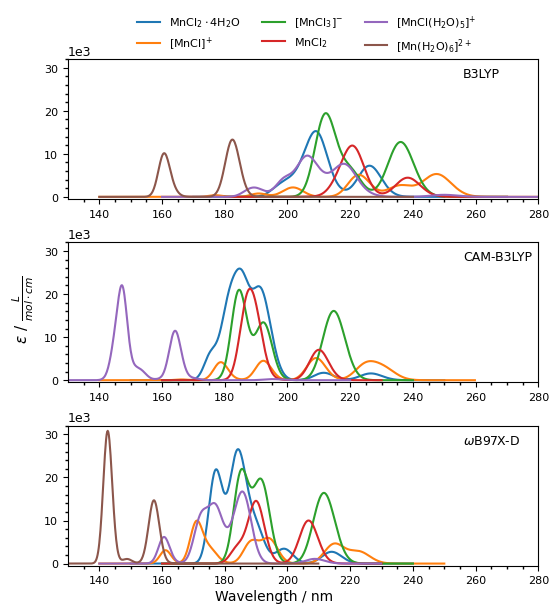

In [5]:
fig, axes = plt.subplots(3,1, figsize=(5.5,6))

make_subplot_functional(axes[0], MnCl2aq_uvvis_water, 'X b3lyp6311++', 'Y b3lyp6311++', r'MnCl$_{2}\cdot4$H$_{2}$O', (3,3), 3)
make_subplot_functional(axes[0], uvvis_water, 'X MnCl+', 'Y MnCl+', r'[MnCl]$^{+}$', (3,3), 3)
make_subplot_functional(axes[0], uvvis_water, 'X MnCl3-', 'Y MnCl3-', r'[MnCl$_{3}$]$^{-}$', (3,3), 3)
make_subplot_functional(axes[0], uvvis_water, 'X MnCl2', 'Y MnCl2', r'MnCl$_{2}$', (3,3), 3)
make_subplot_functional(axes[0], uvvis_water, 'X MnClH2O', 'Y MnClH2O', r'[MnCl(H$_{2}$O)$_{5}$]$^{+}$', (3,3), 3)
make_subplot_functional(axes[0], uvvis_water, 'X MnH2O', 'Y MnH2O', r'[Mn(H$_{2}$O)$_{6}$]$^{2+}$', (3,3), 3)

make_subplot_functional(axes[1], MnCl2aq_uvvis_water, 'X c-b6311++', 'Y c-b6311++', None, (3,3), 1)
make_subplot_functional(axes[1], camb3lyp_uvvis_water, 'X MnCl+', 'Y MnCl+', None, (3,3), 1)
make_subplot_functional(axes[1], camb3lyp_uvvis_water, 'X MnCl3-', 'Y MnCl3-', None, (3,3), 1)
make_subplot_functional(axes[1], camb3lyp_uvvis_water, 'X MnCl2', 'Y MnCl2', None, (3,3), 1)
# make_subplot_functional(axes[1], camb3lyp_uvvis_water, 'X MnClH2O', 'Y MnClH2O', None, (3,3), 1)
make_subplot_functional(axes[1], camb3lyp_uvvis_water, 'X MnH2O', 'Y MnH2O', None, (3,3), 1)

make_subplot_functional(axes[2], MnCl2aq_uvvis_water, 'X wb6311++', 'Y wb6311++', None, (3,3), 1)
make_subplot_functional(axes[2], wb97xd_uvvis_water, 'X MnCl+', 'Y MnCl+', None, (3,3), 1)
make_subplot_functional(axes[2], wb97xd_uvvis_water, 'X MnCl3-', 'Y MnCl3-', None, (3,3), 1)
make_subplot_functional(axes[2], wb97xd_uvvis_water, 'X MnCl2', 'Y MnCl2', None, (3,3), 1)
make_subplot_functional(axes[2], wb97xd_uvvis_water, 'X MnClH2O', 'Y MnClH2O', None, (3,3), 1)
make_subplot_functional(axes[2], wb97xd_uvvis_water, 'X MnH2O', 'Y MnH2O', None, (3,3), 1)


axes[0].set_ylabel(" ", fontsize = 10)
axes[0].set_xlabel(" ", fontsize = 2)
axes[1].set_ylabel(" ", fontsize = 10)
axes[1].set_xlabel(" ", fontsize = 2)
axes[2].set_ylabel(" ", fontsize = 10)
axes[2].set_xlabel(" ", fontsize = 2)
axes[0].set_xlim(130, 280)
axes[1].set_xlim(130, 280)
axes[2].set_xlim(130, 280)
axes[0].set_ylim(-500, 32000)
axes[1].set_ylim(-500, 32000)
axes[2].set_ylim(-500, 32000)

sublabels = ['B3LYP', 'CAM-B3LYP', r'$\omega$B97X-D']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.84, 0.87, l, transform = ax.transAxes, fontsize = 9)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel(r'$\epsilon$ / $\frac{L}{mol\cdot cm}$', fontsize = 11)
fig.tight_layout(pad=0)
plt.savefig('diff_functional_water.png', dpi=150)
plt.show()

In [6]:
def make_subplots_cross(axes, dataname, scilimits, labels_list, ncol):
    ax = axes
    sns.lineplot(data = dataname, ax=ax, dashes=False)
    ax.set_ylabel(None, fontsize = 0)
    ax.set_xlabel(None, fontsize = 0)
    ax.set_xlim(200,600)
    # ax.set_ylim(miny, maxy)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimits)
    ax.yaxis.offsetText.set_fontsize(8)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles = handles, labels = labels_list, frameon = False, ncol = ncol, fontsize = 8)

In [16]:
def make_subplots_calcross(axes, dataset, labels):
    ax = axes
    for x_key, y_key, label in zip(dataset.keys()[::2], dataset.keys()[1::2], labels):
        sns.lineplot(x = x_key, y = y_key, data = dataset, ax = ax, label = label)
    ax.set_ylabel(None, fontsize = 0)
    ax.set_xlabel(None, fontsize = 0)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (-17, -17))
    ax.yaxis.offsetText.set_fontsize(8)
    ax.legend(frameon = False, fontsize = 8)

In [30]:
labels_ForRep = ['1.62 M in water', '1.63 M in HCl', '8.93$\cdot$10$^{-1}$ M in water', '8.76$\cdot$10$^{-1}$ M in HCl']
labels_cal = [r'[MnCl$_{2}$(H$_{2}$O)$_{4}$]', r'[MnCl]$^{+}$', r'[MnCl$_{3}$]$^{-}$', r'[MnCl(H$_{2}$O)$_{5}$]$^{+}$', r'MnCl$_{2}$', r'[Mn(H$_{2}$O)$_{6}$]$^{2+}$']

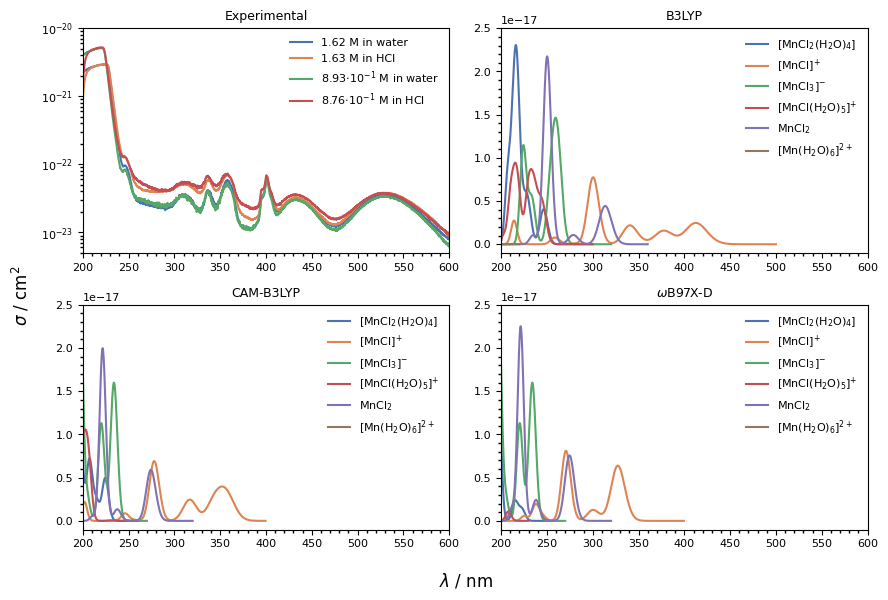

In [23]:
fig, axes = plt.subplots(2,2, figsize=(9,6))
sns.set_palette('deep')

make_subplots_cross(axes[0][0], ForRep, (-22,-22), labels_ForRep, 1)
axes[0][0].set_ylim(5*10**(-24),10**(-20))
axes[0][0].set_yscale("log")
axes[0][0].set_title('Experimental', fontsize=9)

make_subplots_calcross(axes[0][1], cross_sec_b3lyp, labels_cal)
axes[0][1].set_xlim(200,600)
axes[0][1].set_ylim(-1*10**(-18),2.5*10**(-17))
axes[0][1].set_title('B3LYP', fontsize=9)

make_subplots_calcross(axes[1][0], cross_sec_camb3lyp, labels_cal)
axes[1][0].set_xlim(200,600)
axes[1][0].set_ylim(-1*10**(-18),2.5*10**(-17))
axes[1][0].set_title('CAM-B3LYP', fontsize=9)

make_subplots_calcross(axes[1][1], cross_sec_wb97xd, labels_cal)
axes[1][1].set_xlim(200,600)
axes[1][1].set_ylim(-1*10**(-18),2.5*10**(-17))
axes[1][1].set_title(r'$\omega$B97X-D', fontsize=9)

fig.supxlabel(r'         $\lambda$ / nm')
fig.supylabel(r'$\sigma$ / cm$^{2}$')

plt.tight_layout(pad=1)
plt.savefig('crosssec_vacuum.png', dpi=150)
plt.show()

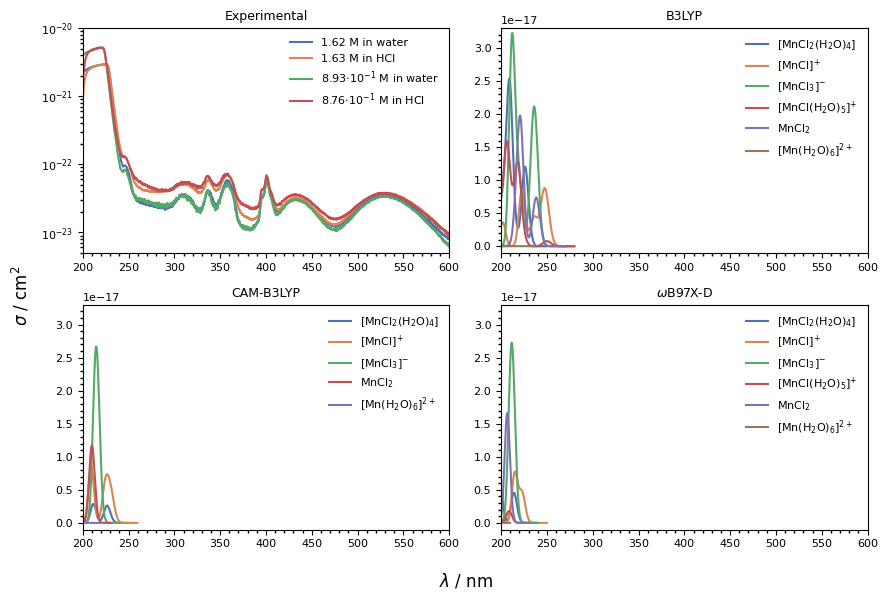

In [27]:
fig, axes = plt.subplots(2,2, figsize=(9,6))
sns.set_palette('deep')

make_subplots_cross(axes[0][0], ForRep, (-22,-22), labels_ForRep, 1)
axes[0][0].set_ylim(5*10**(-24),10**(-20))
axes[0][0].set_yscale("log")
axes[0][0].set_title('Experimental', fontsize=9)

make_subplots_calcross(axes[0][1], CrossSec_b3lyp_water, labels_cal)
axes[0][1].set_xlim(200,600)
axes[0][1].set_ylim(-1*10**(-18),3.3*10**(-17))
axes[0][1].set_title('B3LYP', fontsize=9)

make_subplots_calcross(axes[1][0], CrossSec_camb3lyp_water, labels_cal)
axes[1][0].set_xlim(200,600)
axes[1][0].set_ylim(-1*10**(-18),3.3*10**(-17))
axes[1][0].set_title('CAM-B3LYP', fontsize=9)

make_subplots_calcross(axes[1][1], CrossSec_wb97xd_water, labels_cal)
axes[1][1].set_xlim(200,600)
axes[1][1].set_ylim(-1*10**(-18),3.3*10**(-17))
axes[1][1].set_title(r'$\omega$B97X-D', fontsize=9)

fig.supxlabel(r'         $\lambda$ / nm')
fig.supylabel(r'$\sigma$ / cm$^{2}$')

plt.tight_layout(pad=1)
plt.savefig('crosssec_water.png', dpi=150)
plt.show()

In [76]:
ForRep_rate_0km_path = 'ForRep_0 km.csv'
ForRep_rate_0km = pd.read_csv(ForRep_rate_0km_path, index_col = 0)

ForRep_rate_5km_path = 'ForRep_5 km.csv'
ForRep_rate_5km = pd.read_csv(ForRep_rate_5km_path, index_col = 0)

ForRep_rate_10km_path = 'ForRep_10 km.csv'
ForRep_rate_10km = pd.read_csv(ForRep_rate_10km_path, index_col = 0)

ForRep_rate_15km_path = 'ForRep_15 km.csv'
ForRep_rate_15km = pd.read_csv(ForRep_rate_15km_path, index_col = 0)

ForRep_rate_20km_path = 'ForRep_20 km.csv'
ForRep_rate_20km = pd.read_csv(ForRep_rate_20km_path, index_col = 0)

ForRep_rate_25km_path = 'ForRep_25 km.csv'
ForRep_rate_25km = pd.read_csv(ForRep_rate_25km_path, index_col = 0)

ForRep_rate_30km_path = 'ForRep_30 km.csv'
ForRep_rate_30km = pd.read_csv(ForRep_rate_30km_path, index_col = 0)

ForRep_rate_40km_path = 'ForRep_40 km.csv'
ForRep_rate_40km = pd.read_csv(ForRep_rate_40km_path, index_col = 0)

ForRep_rate_50km_path = 'ForRep_50 km.csv'
ForRep_rate_50km = pd.read_csv(ForRep_rate_50km_path, index_col = 0)

rate_matrix_ForRep_path = 'rate_matrix.csv'
rate_matrix_ForRep = pd.read_csv(rate_matrix_ForRep_path, index_col = 0)

In [73]:
display(rate_matrix_ForRep)

,Unnamed: 0,s1.3,s2.3,s3.3,s4.3
0,0 km,0.000003,0.000004,0.000003,0.000004
1,5 km,0.000004,0.000004,0.000004,0.000005
2,10 km,0.000004,0.000004,0.000004,0.000005
3,15 km,0.000004,0.000004,0.000004,0.000005
4,20 km,0.000004,0.000004,0.000004,0.000005
5,25 km,0.000004,0.000004,0.000004,0.000005
6,30 km,0.000004,0.000004,0.000004,0.000005
7,40 km,0.000004,0.000005,0.000004,0.000005
8,50 km,0.000004,0.000005,0.000004,0.000005


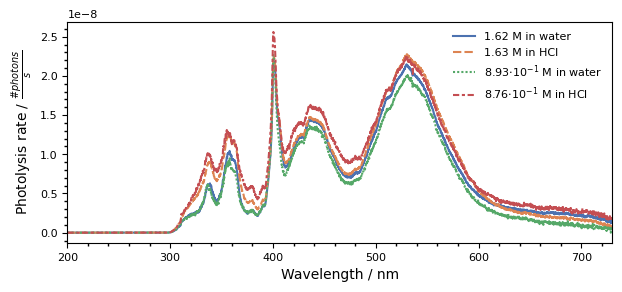

In [59]:
plt.figure(figsize=(6.3,3))
sns.set_palette('deep')

ax = sns.lineplot(ForRep_rate_0km)
ax.set_ylabel(r'Photolysis rate / $\frac{\# photons}{s}$', fontsize = 10)
ax.set_xlabel('Wavelength / nm', fontsize = 10)
ax.set_xlim(200,730)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
ax.yaxis.offsetText.set_fontsize(8)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles = handles, labels = labels_ForRep, frameon = False, fontsize = 8)

plt.tight_layout(pad=1)
plt.savefig('rates_ForRep_0km.png', dpi=150)
plt.show()

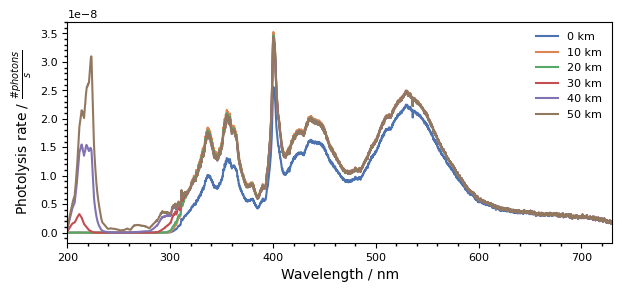

In [83]:
plt.figure(figsize=(6.3,3))
sns.set_palette('deep')

ax = sns.lineplot(data = ForRep_rate_0km, x = ForRep_rate_0km.index, y = ForRep_rate_0km['s4.3'], label = '0 km')
# sns.lineplot(data = ForRep_rate_5km, x = ForRep_rate_5km.index, y = ForRep_rate_0km['s4.3'], label = '5 km')
sns.lineplot(data = ForRep_rate_10km, x = ForRep_rate_10km.index, y = ForRep_rate_10km['s4.3'], label = '10 km')
# sns.lineplot(data = ForRep_rate_15km, x = ForRep_rate_15km.index, y = ForRep_rate_15km['s4.3'], label = '15 km')
sns.lineplot(data = ForRep_rate_20km, x = ForRep_rate_20km.index, y = ForRep_rate_20km['s4.3'], label = '20 km')
# sns.lineplot(data = ForRep_rate_25km, x = ForRep_rate_25km.index, y = ForRep_rate_25km['s4.3'], label = '25 km')
sns.lineplot(data = ForRep_rate_30km, x = ForRep_rate_30km.index, y = ForRep_rate_30km['s4.3'], label = '30 km')
sns.lineplot(data = ForRep_rate_40km, x = ForRep_rate_40km.index, y = ForRep_rate_40km['s4.3'], label = '40 km')
sns.lineplot(data = ForRep_rate_50km, x = ForRep_rate_50km.index, y = ForRep_rate_50km['s4.3'], label = '50 km')
ax.set_ylabel(r'Photolysis rate / $\frac{\# photons}{s}$', fontsize = 10)
ax.set_xlabel('Wavelength / nm', fontsize = 10)
ax.set_xlim(200,730)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
ax.yaxis.offsetText.set_fontsize(8)
# handles, _ = ax.get_legend_handles_labels()
ax.legend(frameon = False, fontsize = 8)

plt.tight_layout(pad=1)
plt.savefig('rates_ForRep.png', dpi=150)
plt.show()

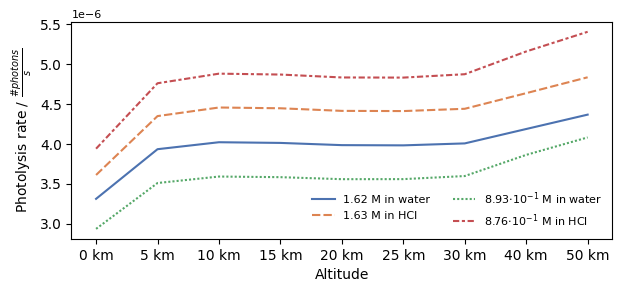

In [81]:
plt.figure(figsize=(6.3,3))
sns.set_palette('deep')

ax = sns.lineplot(rate_matrix_ForRep)
ax.set_ylabel(r'Photolysis rate / $\frac{\# photons}{s}$', fontsize = 10)
ax.set_xlabel('Altitude', fontsize = 10)
# ax.xaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
# ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
ax.yaxis.offsetText.set_fontsize(8)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles = handles, labels = labels_ForRep, frameon = False, fontsize = 8, ncol = 2)

plt.tight_layout(pad=1)
# plt.savefig('rates_ForRep_0km.png', dpi=150)
plt.show()